# **Mounting google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')# Mounts Google Drive to access files directly from Colab.

Mounted at /content/drive


# **See the effect of preprocessing step**

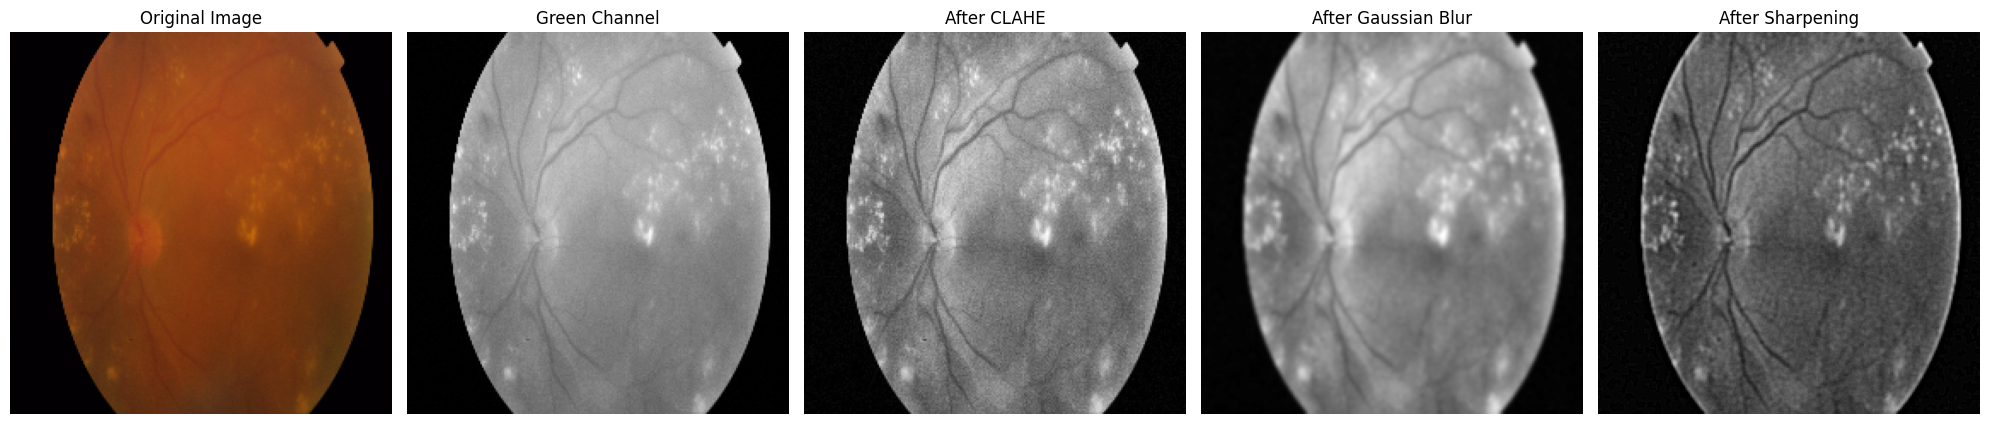

In [ ]:
import cv2  # OpenCV for image processing
import os   # To handle directory paths
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting images

# Preprocessing functions
def resize_image(image, target_size=(224, 224)):
    """Resizes the image to a target size for consistency in model input dimensions."""
    return cv2.resize(image, target_size)

def extract_green_channel(image):
    """Extracts the green channel, commonly used in retinal imaging."""
    green_channel = image[:, :, 1]  # Takes only the green channel of the image.
    return green_channel

def apply_clahe(image):
    """Applies CLAHE to improve contrast, especially useful for medical images."""
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # CLAHE parameters
    return clahe.apply(image)

def apply_gaussian_blur(image, kernel_size=(5, 5)):
    """Applies Gaussian blur to reduce noise and smooth the image."""
    return cv2.GaussianBlur(image, kernel_size, 0)

def sharpen_image(image):
    """Sharpens the image to highlight edges and finer details."""
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])  # Sharpening kernel
    return cv2.filter2D(image, -1, sharpen_kernel)

def normalize_image(image):
    """Normalizes pixel values to the range [0, 1] to prepare the image for input to a model."""
    return image / 255.0

# Path to a sample input image
input_image_path = '/content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/dr224/Severe/0cb14014117d.png'

# Function to visualize each preprocessing step
def visualize_preprocessing(image_path):
    # Read the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image: {image_path}")
        return

    # Step-by-step image processing
    image_resized = resize_image(image)  # Step 1: Resize
    green_channel = extract_green_channel(image_resized)  # Step 2: Green Channel
    image_clahe = apply_clahe(green_channel.copy())  # Step 3: CLAHE
    image_blurred = apply_gaussian_blur(image_clahe.copy(), kernel_size=(5, 5))  # Step 4: Gaussian Blur
    image_sharpened = sharpen_image(image_blurred.copy())  # Step 5: Sharpen
    image_normalized = normalize_image(image_sharpened.copy())  # Step 6: Normalize

    # Convert images to the [0, 255] range for displaying
    green_channel_disp = green_channel
    image_clahe_disp = image_clahe
    image_blurred_disp = image_blurred
    image_sharpened_disp = image_sharpened
    image_normalized_disp = image_normalized * 255.0  # Scaling normalized image for display

    # Plotting all stages
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    axes[0].imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")

    axes[1].imshow(green_channel_disp, cmap='gray')
    axes[1].set_title("Green Channel")

    axes[2].imshow(image_clahe_disp, cmap='gray')
    axes[2].set_title("After CLAHE")

    axes[3].imshow(image_blurred_disp, cmap='gray')
    axes[3].set_title("After Gaussian Blur")

    axes[4].imshow(image_sharpened_disp, cmap='gray')
    axes[4].set_title("After Sharpening")

    for ax in axes:
        ax.axis("off")  # Hide axis for a cleaner look

    plt.tight_layout()
    plt.show()

# Visualize the preprocessing for one image
visualize_preprocessing(input_image_path)


# **Saving all the images after preprocessing**

In [ ]:

import cv2  # OpenCV library for image processing.
import os   # For handling directory paths and files.
import numpy as np  # For numerical operations and image manipulation.

# Preprocessing functions
def resize_image(image, target_size=(224, 224)):
    """Resizes the image to the target size."""
    return cv2.resize(image, target_size)

def extract_green_channel(image):
    """Extracts the green channel from the image, often the most useful channel in medical imaging for retinal images."""
    return image[:, :, 1]

def apply_clahe(image):
    """Applies CLAHE (Contrast Limited Adaptive Histogram Equalization) to enhance contrast."""
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def apply_gaussian_blur(image, kernel_size=(5, 5)):
    """Applies Gaussian blur to reduce noise and detail in the image."""
    return cv2.GaussianBlur(image, kernel_size, 0)

def sharpen_image(image):
    """Sharpens the image to make details more prominent."""
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
    return cv2.filter2D(image, -1, sharpen_kernel)

def normalize_image(image):
    """Normalizes pixel values to the range [0, 1] for consistency."""
    return image / 255.0

def augment_image(image):
    """Applies a horizontal flip to the image as a form of data augmentation."""
    return cv2.flip(image, 1)

# Paths for batch processing
input_folder = '/content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/dr224/'  # Folder containing raw images.
output_folder = '/content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/'  # Folder to save processed images.

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)  # Ensures the output directory exists.

# Function to preprocess and save each image
def preprocess_image(image_path, output_path, augment=False):
    """Preprocesses a single image by resizing, extracting the green channel, applying CLAHE, blurring, sharpening, normalizing,
       and optionally augmenting (flipping). Saves the processed image to the output path."""
    image = cv2.imread(image_path)  # Loads the image from the given path.

    if image is None:  # Checks if the image was loaded successfully.
        print(f"Failed to load image: {image_path}")
        return

    # Step-by-step preprocessing pipeline
    image_resized = resize_image(image)  # Step 1: Resize the image.
    green_channel = extract_green_channel(image_resized)  # Step 2: Extract the green channel.
    image_clahe = apply_clahe(green_channel.copy())  # Step 3: Apply CLAHE on the green channel.
    image_blurred = apply_gaussian_blur(image_clahe.copy(), kernel_size=(5, 5))  # Step 4: Apply Gaussian blur.
    image_sharpened = sharpen_image(image_blurred.copy())  # Step 5: Sharpen the image.
    image_normalized = normalize_image(image_sharpened.copy())  # Step 6: Normalize the image.

    if augment:  # Step 7: Apply augmentation if specified.
        image_normalized = augment_image(image_normalized)

    # Saves the processed image after scaling back to [0, 255] range.
    cv2.imwrite(output_path, (image_normalized * 255).astype(np.uint8))
    print(f"Processed and saved: {output_path}")

# Function to process the entire dataset, including subfolders
def process_dataset(input_dir, output_dir, augment=False):
    """Processes all images in the dataset directory by calling preprocess_image for each.
       Creates corresponding folder structure in the output directory."""
    for root, dirs, files in os.walk(input_dir):
        relative_path = os.path.relpath(root, input_dir)  # Finds relative path for organizing output.
        save_dir = os.path.join(output_dir, relative_path)
        os.makedirs(save_dir, exist_ok=True)  # Ensures subdirectories in output folder match input.

        for filename in files:  # Loops through each file in the folder.
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Processes only image files.
                input_path = os.path.join(root, filename)
                output_path = os.path.join(save_dir, filename)
                preprocess_image(input_path, output_path, augment=augment)  # Processes and saves the image.

# Preprocesses all images in the dataset folder with augmentation
process_dataset(input_folder, output_folder, augment=True)


Processed and saved: /content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/Severe/0cb14014117d.png
Processed and saved: /content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/Severe/0c917c372572.png
Processed and saved: /content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/Severe/6fb656d506b2.png
Processed and saved: /content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/Severe/e0b5a982a018.png
Processed and saved: /content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/Severe/aea59ebec445.png
Processed and saved: /content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/Severe/19244004583f.png
Processed and saved: /content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/Severe/dbb2c63f6f08.png
Processed and saved: /content/drive/My Dr

# **MobileNet_v2 model**

In [ ]:
!pip install torch torchvision matplotlib scikit-learn

import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from torchvision import models  # Import models here

# Define the path to your dataset in Colab
data_dir = '/content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/'

# Define the image size and transformations (with data augmentation)
image_size = 224
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.RandomRotation(10),      # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = ImageFolder(root=data_dir, transform=transform)

# Define sizes for train and validation sets (80%, 20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Set batch size and number of epochs
batch_size = 64  # Custom batch size
num_epochs = 10  # Custom number of epochs

# Create data loaders for train and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Train size: {train_size}, Validation size: {val_size}")

# Load the pre-trained MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)

# Modify the classifier to fit your number of output classes
num_classes = len(dataset.classes)  # Ensure dataset is defined and loaded properly

# Modify the last layer of the classifier (MobileNetV2 uses a classifier block)
model.classifier[1] = nn.Linear(in_features=model.classifier[1].in_features, out_features=num_classes)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Print the modified model architecture
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 34.7MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

Epoch [1/10], Loss: 0.8114, Training Accuracy: 69.29%
Validation Loss: 0.7022, Validation Accuracy: 73.59%
Epoch [2/10], Loss: 0.5487, Training Accuracy: 79.40%
Validation Loss: 0.5189, Validation Accuracy: 77.60%
Epoch [3/10], Loss: 0.5055, Training Accuracy: 81.51%
Validation Loss: 0.4799, Validation Accuracy: 82.15%
Epoch [4/10], Loss: 0.4679, Training Accuracy: 83.26%
Validation Loss: 0.4898, Validation Accuracy: 81.42%
Epoch [5/10], Loss: 0.3912, Training Accuracy: 85.45%
Validation Loss: 0.4908, Validation Accuracy: 80.33%
Epoch [6/10], Loss: 0.3528, Training Accuracy: 87.16%
Validation Loss: 0.5064, Validation Accuracy: 83.06%
Epoch [7/10], Loss: 0.3734, Training Accuracy: 86.85%
Validation Loss: 0.5185, Validation Accuracy: 82.88%
Epoch [8/10], Loss: 0.3038, Training Accuracy: 88.41%
Validation Loss: 0.5033, Validation Accuracy: 82.88%
Epoch [9/10], Loss: 0.2885, Training Accuracy: 89.43%
Validation Loss: 0.5228, Validation Accuracy: 81.97%
Epoch [10/10], Loss: 0.2618, Training

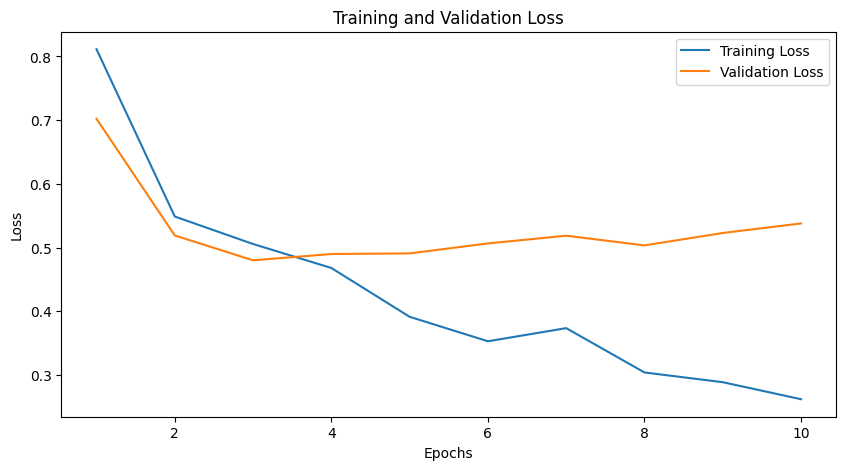

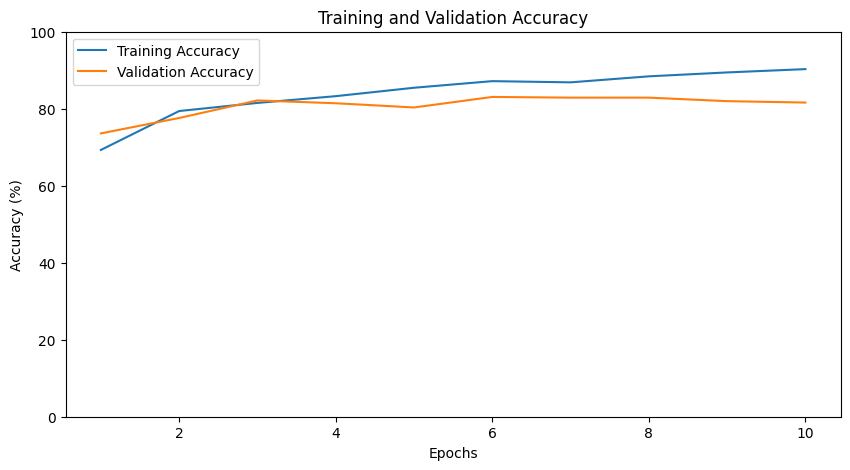

In [ ]:
# Set up optimizer and loss function
learning_rate = 1e-4  # Reduced learning rate
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()  # Accumulate loss

        _, predicted = torch.max(outputs.data, 1)  # Get predictions
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()  # Count correct predictions

    # Calculate average training loss and accuracy
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%')

    # Validation phase
    model.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()  # Accumulate validation loss

            _, predicted = torch.max(outputs.data, 1)  # Get predictions
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()  # Count correct predictions

    # Calculate average validation loss and accuracy
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

# Plotting training and validation loss
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


<Figure size 800x800 with 0 Axes>

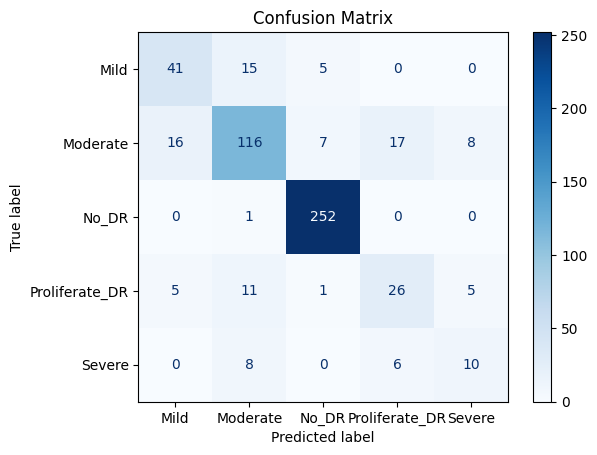

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

all_preds = []
all_labels = []

# Disable gradient computation
with torch.no_grad():
    for images, labels in test_loader:  # Use val_loader for validation set, test_loader for test set
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Get predictions
        _, predicted = torch.max(outputs.data, 1)

        # Store the labels and predictions
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Convert to numpy arrays for confusion matrix
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# **efficientnet_b0**

Train size: 2929, Validation size: 733


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 44.8MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

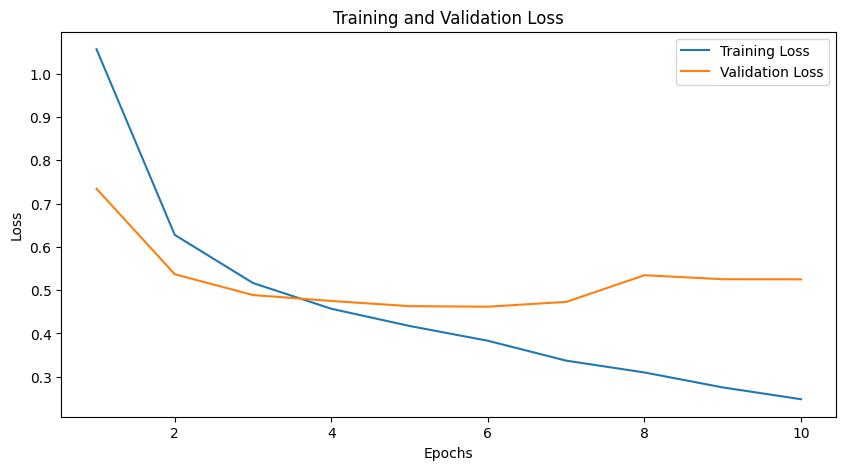

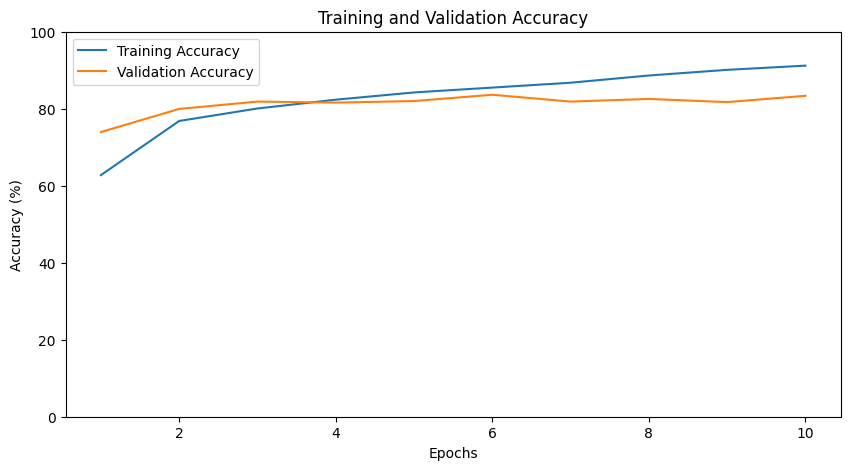

<Figure size 800x800 with 0 Axes>

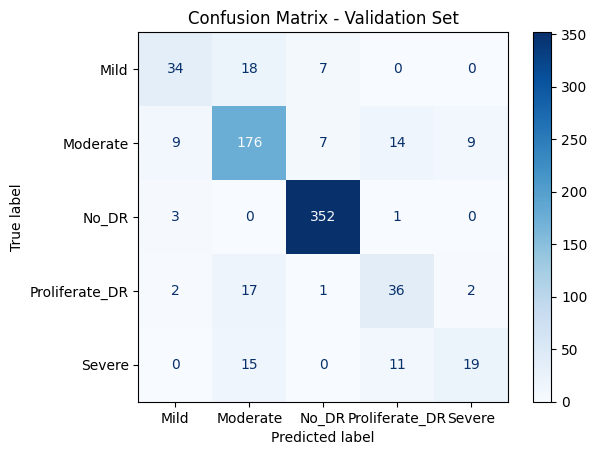

Validation Accuracy: 84.17%
Validation Precision: 0.8361
Validation Recall: 0.8417
Validation F1 Score: 0.8368


In [ ]:
# Install necessary libraries for deep learning and data visualization
!pip install torch torchvision matplotlib scikit-learn

# Importing necessary libraries and modules
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from torchvision import models

# Define the path to the dataset stored in Google Drive
data_dir = '/content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/'

# Set image size and define data transformations, including data augmentation techniques
image_size = 224
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),         # Resize images to a consistent size
    transforms.RandomHorizontalFlip(),                   # Randomly flip images horizontally
    transforms.RandomRotation(10),                       # Randomly rotate images by up to 10 degrees
    transforms.ToTensor(),                               # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406],     # Normalize images to match pre-trained model's requirements
                         std=[0.229, 0.224, 0.225])
])

# Load the dataset with specified transformations
dataset = ImageFolder(root=data_dir, transform=transform)

# Define the training and validation split ratios (80% training, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Randomly split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Set batch size and number of training epochs
batch_size = 64
num_epochs = 10

# Initialize data loaders to efficiently load the data in batches
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Print the number of samples in training and validation sets
print(f"Train size: {train_size}, Validation size: {val_size}")

# Load the pre-trained EfficientNet-B0 model for transfer learning
model = models.efficientnet_b0(pretrained=True)

# Modify the classifier layer to match the number of output classes in the dataset
num_classes = len(dataset.classes)
model.classifier[1] = nn.Linear(in_features=model.classifier[1].in_features, out_features=num_classes)

# Check if GPU is available and set the device to GPU or CPU accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Display the modified model architecture
print(model)

# Define the optimizer and the loss function
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Initialize lists to store training and validation metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop to optimize the model
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Iterate over the training data in batches
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear any previously stored gradients
        outputs = model(images)  # Perform a forward pass to get model predictions
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass to calculate gradients
        optimizer.step()  # Update the model weights

        running_loss += loss.item()  # Accumulate training loss

        _, predicted = torch.max(outputs.data, 1)  # Get predicted labels
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()  # Count correct predictions

    # Calculate average training loss and accuracy for the epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%')

    # Validation phase to evaluate model performance on validation data
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()  # Accumulate validation loss

            _, predicted = torch.max(outputs.data, 1)  # Get predicted labels
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()  # Count correct predictions

    # Calculate average validation loss and accuracy for the epoch
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

# Plot training and validation losses over epochs
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Ensure the y-axis is limited to 0-100%
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model's performance on the validation set
model.eval()
all_preds = []
all_labels = []

# Collect predictions and labels for the validation set
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)  # Get predicted labels
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays to use in performance metrics
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Generate and display the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Validation Set")
plt.show()

# Calculate and print additional performance metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}")


# **DenseNet121 Model**

Train size: 2929, Validation size: 733


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 81.5MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

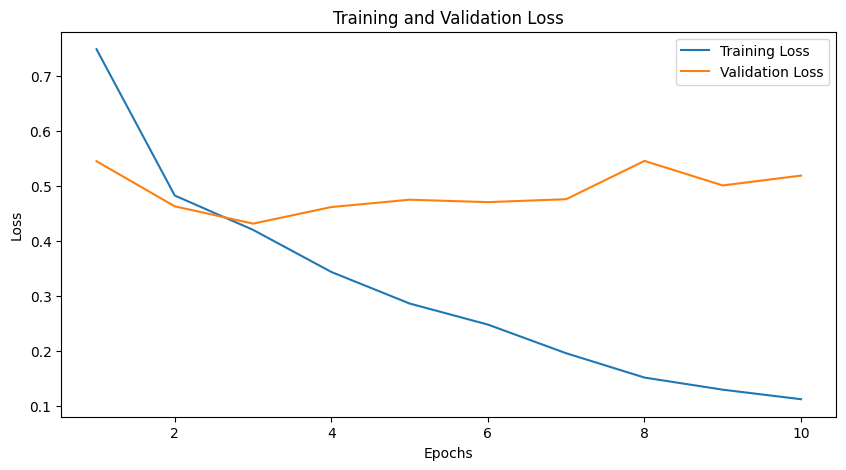

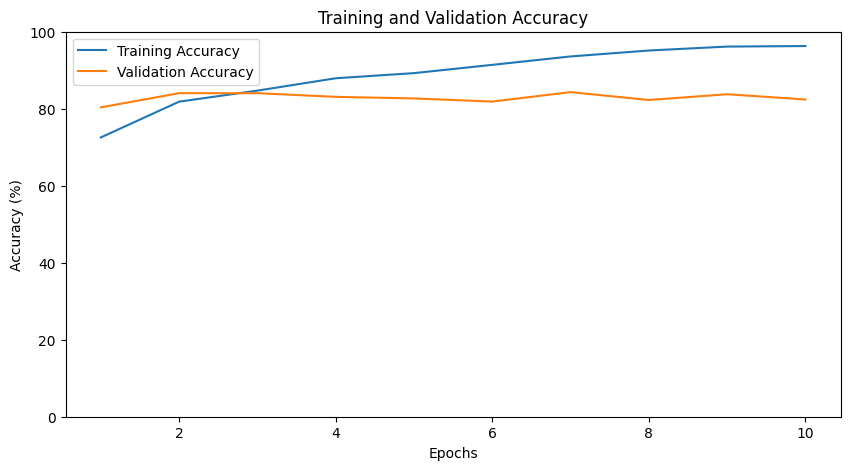

<Figure size 800x800 with 0 Axes>

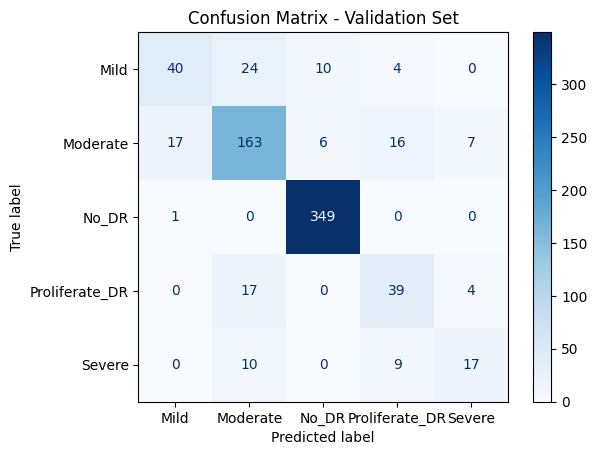

Validation Accuracy: 82.95%
Validation Precision: 0.8239
Validation Recall: 0.8295
Validation F1 Score: 0.8244


In [ ]:
# Import required libraries
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from torchvision import models  # Import pre-trained models from torchvision

# Define the path to your dataset in Google Colab
data_dir = '/content/drive/My Drive/Colab Notebooks/Diabetic ratinopathy/messidor-2/DR224/newpreprocess/'

# Set the image size and define the transformations (including data augmentation)
image_size = 224
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),          # Resize images to target size
    transforms.RandomHorizontalFlip(),                    # Randomly flip images horizontally for augmentation
    transforms.RandomRotation(10),                        # Randomly rotate images for augmentation
    transforms.ToTensor(),                                # Convert images to tensor format
    transforms.Normalize(mean=[0.485, 0.456, 0.406],      # Normalize images with mean and std for ImageNet
                         std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder (assumes images are in class-specific folders)
dataset = ImageFolder(root=data_dir, transform=transform)

# Split the dataset into training (80%) and validation (20%) sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Set batch size and number of epochs
batch_size = 64
num_epochs = 10

# Create data loaders for both train and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Train size: {train_size}, Validation size: {val_size}")

# Load the pre-trained DenseNet121 model from torchvision models
model = models.densenet121(pretrained=True)

# Modify the model’s final classifier layer to match the number of output classes in the dataset
num_classes = len(dataset.classes)
model.classifier = nn.Linear(in_features=model.classifier.in_features, out_features=num_classes)

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Display the modified DenseNet121 model architecture
print(model)

# Set up the optimizer and the loss function
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Using Adam optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification

# Lists to store training and validation losses and accuracies for visualization
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Iterate over the training dataset
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Reset gradients
        optimizer.zero_grad()
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update model parameters

        running_loss += loss.item()  # Accumulate loss for average calculation

        # Get predictions and count correct predictions
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for this epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%')

    # Validation phase
    model.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    # Disable gradient computation during validation
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            # Get predictions and count correct predictions
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy for this epoch
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

# Plotting training and validation loss over epochs
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate model performance on the validation set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Store the labels and predictions for metrics
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays for metric calculations
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Generate and display the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Validation Set")
plt.show()

# Calculate and print additional performance metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}")
